# Covid restrictions QALY/time-tradeoff analysis

In order to put forward a utilitarian defence of no covid restrictions, I attemp to carry out a QALY(Quality adjusted life years)'ish analysis of as to whether more quality adjusted lifeyears are lost due to covid or covid restrictions.

The analysis is extremely naive as it ignored nth order effects.

$\Large QALY = \sum_{event}^{death} Q_{i}* x_{i}$

## Methdology

$\textbf{Covid restrictions:}$



$\text{Lifeyears lost due to restrictions = A}$


$\text{No of. people who suffered because of restrictions = B}$

$\text{Time under restrictions = C}$

$\text{Life year adjustment = D}$

$\text{A = B  C  D}$

$\text{______________________________________________________}$

$\textbf{ No Covid restrictions:}$

$\text{Lifeyears lost due to no restrictions = E}$

$\text{No of. years more every person could have lived = F}$

$\text{No of. covid deaths = G}$

$\text{E = F G }$

$\text{A ? E , will determine my conclusion.}$

To read up more on QALY : https://en.wikipedia.org/wiki/Quality-adjusted_life_year

To find the variable D (life year adjustment), I surveyed a non partisan forum of people to see how they feel about COVID restrictions. Survey n = 98

I asked them how much time would they trade to avoid 1 year od covid restrictions. If they trade 0 time, that means they don't care, if they trade positive times that means they didn't like living under restrictions, and negative means they did.

In [1]:
import pandas as pd 
import re 
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

In [2]:
#I did a bit of manual cleaning before calling in the file
#Survey
df = pd.read_csv('survey.csv')

In [3]:
df.head(10)

,time
0,2 years more
1,1 month
2,1 month
3,0 months
4,0
5,1 month less
6,0
7,3 months
8,0
9,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   time    93 non-null     object
dtypes: object(1)
memory usage: 872.0+ bytes


### Data cleaning

In [5]:
#Grouping data as much as the software can initially before data cleaning
df.value_counts().head() 

time        
0               33
1 month         15
1 whole year    11
3 months         9
2 months         3
dtype: int64

In [6]:
#Turning series into dataframe
df = pd.DataFrame({'time': [x[0] for x in df.value_counts().index],'counts': [x for x in df.value_counts()]}) 

In [7]:
df.head(10)

,time,counts
0,0,33
1,1 month,15
2,1 whole year,11
3,3 months,9
4,2 months,3
5,6 months,2
6,0 months,2
7,2 years more,2
8,1 year more,1
9,0.2 months,1


In [8]:
#color coding liked vs disliked, will help plotting easier.

def find_color(x): 
    if 'less' in x.split():
        return 'green'
    return 'red'

df['color'] = df['time'].apply(find_color)

In [9]:
#Fixing bad user input mostly

df['time'] = df['time'].str.strip() 

df['time'] = df['time'].str.replace(r'more|less|whole', '',regex=True) #I can get rid of more&less now since I have colors

df['time'] = df['time'].str.replace(r'^[\s]*0[\s\w]+','0',regex=True) #Replace 0 anything with just 0

df['time'] = df['time'].str.replace(r'(s|\s)+$', '', regex = True) #Remove 's' from ends of words

In [10]:
#Converting user input to numbers

def turntodays(x):
    
    multiplier_dict = {'day': 1, 'week': 7, 'month': 30, 'year': 365} #convert other time units to days
    
    if x == '0':
        return 0
    elif x == 'Infinity':
        return 365 #1 year, any value too high will be an extreme outlier as the max is 10 years,
    #took some liberty to guess the value here
    else:
        number,multiplier = x.split()[0],x.split()[1]
        return float(number)*multiplier_dict[multiplier]
        
df['time'] = df['time'].apply(turntodays)

In [11]:
df.head

<bound method NDFrame.head of       time  counts  color
0      0.0      33    red
1     30.0      15    red
2    365.0      11    red
3     90.0       9    red
4     60.0       3    red
5    180.0       2    red
6      0.0       2    red
7    730.0       2    red
8    365.0       1    red
9      6.0       1    red
10     1.0       1    red
11     1.0       1    red
12    30.0       1  green
13   365.0       1  green
14   365.0       1    red
15    10.0       1    red
16   240.0       1    red
17  3650.0       1    red
18   730.0       1    red
19   730.0       1    red
20  1095.0       1    red
21   120.0       1    red
22  1825.0       1    red
23   300.0       1    red>

In [12]:
#More untangling of user input
g= df.groupby(['time','color']).counts.sum()

df_f = pd.DataFrame({'time': [x[0] for x in g.index]
                     ,'counts': [x for x in g]
                    ,'color': [x[1] for x in g.index]})

In [13]:
#Making time values make sense

df_f['time'] = df_f.apply(lambda row:row.time if row.color == 'red' else -row.time, axis = 1)

### Analysis

In [14]:
df_f #Finally looks good to work with.

,time,counts,color
0,0.0,35,red
1,1.0,2,red
2,6.0,1,red
3,10.0,1,red
4,-30.0,1,green
5,30.0,15,red
6,60.0,3,red
7,90.0,9,red
8,120.0,1,red
9,180.0,2,red


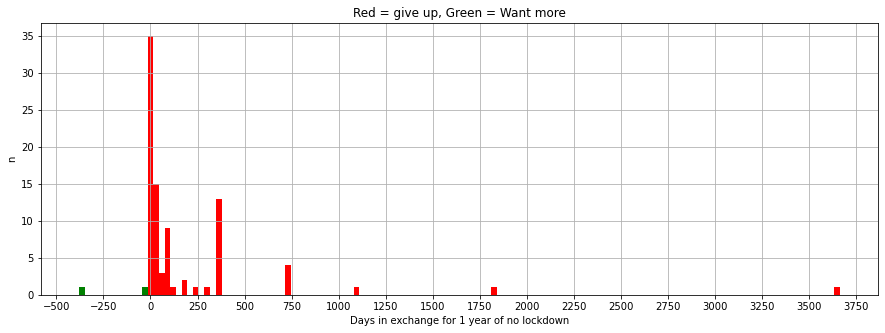

In [15]:
#Plot

fig = plt.figure(figsize = (15, 5))
plt.bar(df_f['time'], df_f['counts'], color =df_f['color'],
        width = 30)


plt.xlabel("Days in exchange for 1 year of no lockdown")
plt.ylabel("n")
plt.xticks(np.arange(-500, 4000, 250))
plt.grid()
plt.title("Red = give up, Green = Want more")

plt.show()

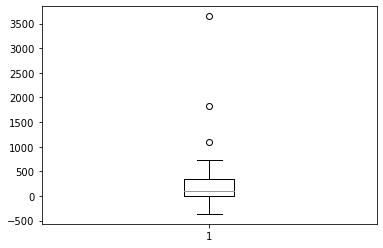

In [16]:
# Box plot

fig, ax = plt.subplots()
ax.boxplot(df_f['time'])
plt.show()

In [17]:
#Statistics of survey data, I can either use the mean, or 50% percentile.

df_f['time'].describe(include='all')

count      18.000000
mean      461.500000
std       940.145686
min      -365.000000
25%         7.000000
50%       105.000000
75%       348.750000
max      3650.000000
Name: time, dtype: float64

## Calculations

I will plug in some numbers into the equations mentioned in the methodology.

I will use data from Sweden as they have readiliy available,uptodate and clean data to work with. However you can change the variables for a country of your choice.


Relevant information:

Sweden infection fatality ratio = https://www.folkhalsomyndigheten.se/contentassets/53c0dc391be54f5d959ead9131edb771/infection-fatality-rate-covid-19-stockholm-technical-report.pdf

Worldwide lockdown stringency = https://ourworldindata.org/grapher/covid-stringency-index

Sweden Excess deaths = https://www.reuters.com/article/us-health-coronavirus-europe-mortality-idUSKBN2BG1R


Using swedens excess deaths, life years lost = 63700

Sweden's IFR should be roughly 0.6%

Sweden population = ~ 10,377,781 = a

Average age of a swede = ~41 = b

Average lifespan of a swede = ~83 = c

Assuming the absolute worst case scenario that everyone in Sverige gets covid over a year and the average age of death is the average person:

life years lost to covid = a(0.6/100)(c-b) = 2678900.812,
Making some more heroic assumptions. Given that Swedens lockdown stringency is similar to that of the rest of the west (even thought that feels wrong, Ourworld in data assumes so).

I will assume that the sample of the people that responded to my survey roughly maps to how the average swede would have felt over lockdowns, which they largely didn't like. On average they traded off 1.26 years to have not lived in a lockdown at all.

So on average a year under restrictions is worth 365/461 of a normal year. I'll assume covid restrictions for 6 months.

life years lost due to lockdown = a*(461/365)(0.5) + 63700 = 6617339.782191781 years.



## Conclusion:

In [18]:
2678900.812 < 6617339.782191781

True

You decide for yourself.

# Further refining the QALY

Some more work can be done on estimating the quality adjusted lifeyears estimate, data on this is extremely difficult to find, the image below is a summary of the best I could find.

Since there is no quality adjusting to do, I just need to compare baseline average life satisfaction metrics by age.

Source: https://www.ons.gov.uk/peoplepopulationandcommunity/wellbeing/articles/measuringnationalwellbeing/atwhatageispersonalwellbeingthehighest

In [19]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://www.ons.gov.uk/resource?uri=/peoplepopulationandcommunity/wellbeing/articles/measuringnationalwellbeing/atwhatageispersonalwellbeingthehighest/31a02c4d.png",
      width = 900, height = 300)

Most people over the age of 20 say that their twenties are their best life years, so I will base that as 1 life year and everything else will be a ratio of that relative to how many other people chose other ages.

In [20]:
#Did some manual cleaning, raw file is formatted horribly for code based analysis.
df_qa = pd.read_csv('qaly.csv')

In [21]:
df_qa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   76 non-null     int64  
 1   avg_lifesatisfaction  76 non-null     float64
 2   avg_worthwhile        76 non-null     float64
 3   avg_happiness         76 non-null     float64
 4   avg_anxiety           76 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 3.1 KB


In [22]:
#Making a mean adjusted field
df_qa['adjusted'] = (df_qa['avg_lifesatisfaction'] + df_qa['avg_worthwhile'] + \
                     df_qa['avg_happiness'] - df_qa['avg_anxiety'])/4

In [44]:
df_qa.tail(10)

,age,avg_lifesatisfaction,avg_worthwhile,avg_happiness,avg_anxiety,adjusted,ratio
66,82,7.74,7.78,7.59,2.59,5.130,0.970672
67,83,7.74,7.78,7.59,2.59,5.130,0.970672
68,84,7.74,7.78,7.59,2.59,5.130,0.970672
69,85,7.62,7.53,7.51,2.60,5.015,0.948912
70,86,7.62,7.53,7.51,2.60,5.015,0.948912
71,87,7.62,7.53,7.51,2.60,5.015,0.948912
72,88,7.62,7.53,7.51,2.60,5.015,0.948912
73,89,7.62,7.53,7.51,2.60,5.015,0.948912
74,90,7.62,7.53,7.51,2.60,5.015,0.948912
75,91,7.54,7.26,7.31,2.57,4.885,0.924314


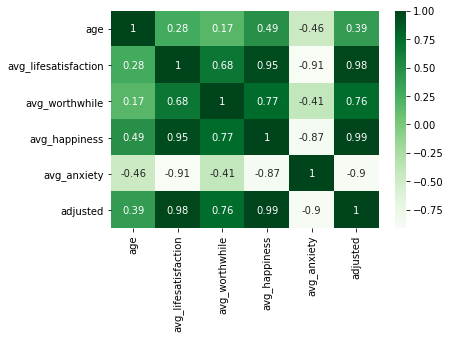

In [24]:
# Correlation matrix lets me see how the datasets author weighted the fields
ax = sns.heatmap(df_qa.corr(), annot=True, cmap = "Greens")

In [25]:
# Getting relative adjusted values.
df_qa['ratio'] = df_qa['adjusted']/df_qa['adjusted'].max()

In [48]:
def Qi_mean(event,death):#90-91 implies 90+
        
    if event == death:
        raise Exception("This function requires a difference of a year or more"\
                       "Just increase age of death by one")
    if event > death:
        raise Exception("Things can't happen to you after you die.")
        
    start_index = df_qa.loc[df_qa.age == event].index.values.astype(int)[0]
    end_index = df_qa.loc[df_qa.age == death].index.values.astype(int)[0]
    
    adjusted_sum = df_qa['ratio'].loc[start_index:end_index].sum()
     
    return adjusted_sum/(end_index-start_index+1)

### More analysis, this time average case rather than worst case

Of those who died of covid, a majority were in nursing homes, and of that they had a median remaining lifespan of 5-9 months.(Most of them 80+)

Source: https://link.springer.com/article/10.1007/s12115-020-00508-0

I'll be reusing the equations from before but just change the weightage and use more realistic values.

#### life years lost due to lockdown = a*(461/365)(0.5) + 63700 = 6617339.782191781 years.

In [69]:
life_lost_covid = 10377781*(10/100)*Qi_mean(80,91)*0.05*(9/12)

#Using upperlimit of infection fatality ratio, and multiplying by ratio of population over 80

In [71]:
life_lost_covid <  6617339.782191781

True

Using more realistic numbers its all the more evident that much more lifeyears are lost to lockdowns, than no lockdowns.